In [104]:
# Import required packages for this project.
from pathlib import Path

import os
import calendar
import numpy as np
import networkx as nx
import pandas as pd

import seaborn as sns

import matplotlib.pyplot as plt
from matplotlib import cm

%matplotlib inline

In [105]:
# Established path to access data for this project.
DATA = Path("D:\Masters Of Data Science\ANA 680\Module 1\Assignment 2")

In [106]:
# Load the required data for this project.
BCW_df = pd.read_csv(DATA / 'breast-cancer-wisconsin.data', header=None)

# View some initial records.
BCW_df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [107]:
# Generate data frame dimensions.
BCW_df.shape

(699, 11)

In [108]:
# Generate variable data types.
BCW_df.dtypes

0      int64
1      int64
2      int64
3      int64
4      int64
5      int64
6     object
7      int64
8      int64
9      int64
10     int64
dtype: object

In [109]:
# Generate number of missing values.
BCW_df.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
dtype: int64

In [110]:
BCW_df.describe().map('{:,.3f}'.format)

,0,1,2,3,4,5,7,8,9,10
count,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000,699.000
mean,"1,071,704.099",4.418,3.134,3.207,2.807,3.216,3.438,2.867,1.589,2.690
std,"617,095.730",2.816,3.051,2.972,2.855,2.214,2.438,3.054,1.715,0.951
min,"61,634.000",1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,2.000
25%,"870,688.500",2.000,1.000,1.000,1.000,2.000,2.000,1.000,1.000,2.000
50%,"1,171,710.000",4.000,1.000,1.000,1.000,2.000,3.000,1.000,1.000,2.000
75%,"1,238,298.000",6.000,5.000,5.000,4.000,4.000,5.000,4.000,1.000,4.000
max,"13,454,352.000",10.000,10.000,10.000,10.000,10.000,10.000,10.000,10.000,4.000


Exploratory Data Analysis For Relevant Dataset Variables

In [111]:
# Evaluate the Class binary categorical target variable value counts.
BCW_df[10].value_counts()

10
2    458
4    241
Name: count, dtype: int64

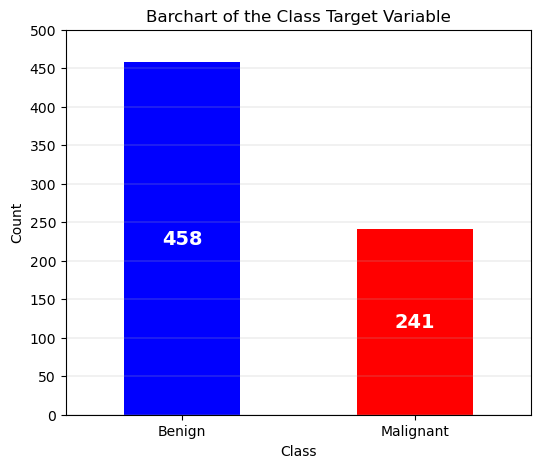

In [112]:
# Barchart for the Class categorical target variable (Benign for 2, Malignant for 4).
dfg = BCW_df[10].value_counts()
ax = dfg.plot(kind='bar', title='Barchart of the Class Target Variable', ylabel='Count', xlabel='Class', color= ['blue', 'red'], rot=0, figsize=(6,5))
ax.bar_label(ax.containers[0], label_type='center', color='white', fontsize=14, fontweight='bold')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Benign', 'Malignant'])
plt.yticks(np.arange(0,501,step=50))
plt.grid(axis='y', linewidth=0.25)
plt.show()

In [113]:
# Replace Class categorical target variable values with binary values(2: 0, 4: 1).
BCW_df[10] = BCW_df[10].replace({2: 0, 4: 1})

In [114]:
# Evaluate the Clump Thickness variable value counts.
BCW_df[1].value_counts()

1
1     145
5     130
3     108
4      80
10     69
2      50
8      46
6      34
7      23
9      14
Name: count, dtype: int64

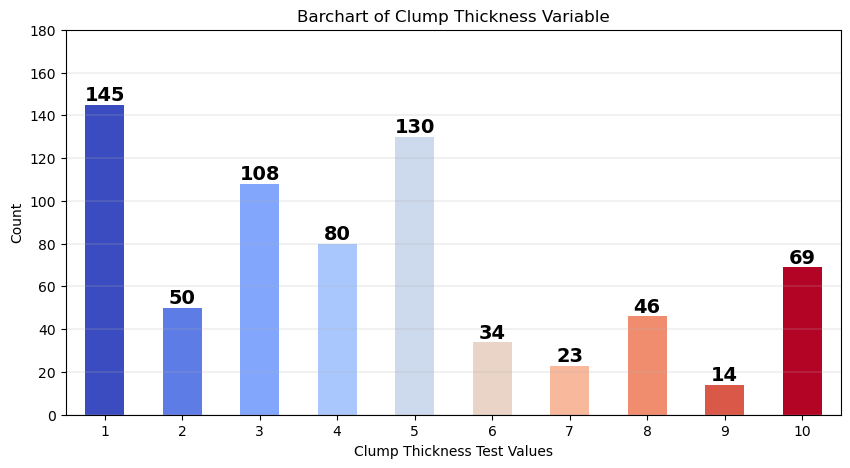

In [115]:
# Barchart for the Clump Thickness variable.
dfg = BCW_df[1].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Clump Thickness Variable', ylabel='Count', xlabel='Clump Thickness Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 181, step=20))
plt.grid(axis='y', linewidth=0.25)
plt.show()

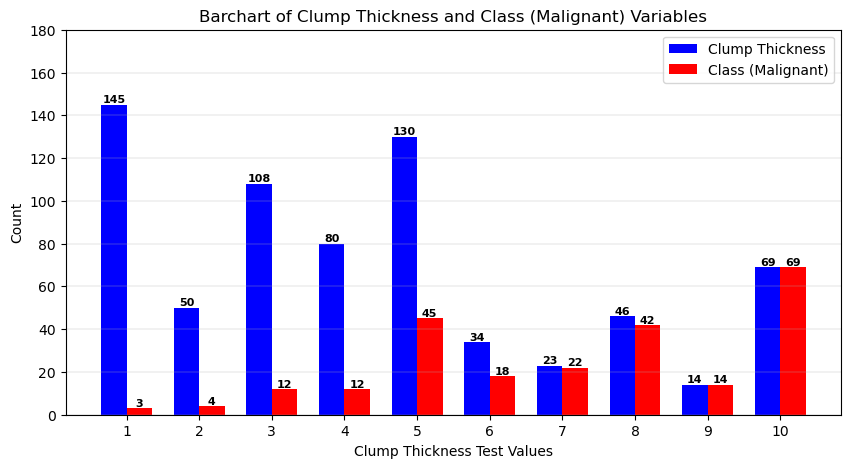

In [116]:
# Barchart for Clump Thickness variable with Class (Malignant).
# Get counts for Clump Thickness.
test_counts = BCW_df[1].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (Malignant) for each Clump Thickness value.
class_malignant = BCW_df[BCW_df[10] == 1][1].value_counts().reindex(range(1, 11))

# Set up the bar chart.
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Clump Thickness bars (blue).
ax.bar(x - width/2, test_counts, width, label='Clump Thickness', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Clump Thickness and Class (Malignant) Variables')
ax.set_xlabel('Clump Thickness Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 181, step=20))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [117]:
# Evaluate the Uniformity of Cell Size variable value counts.
BCW_df[2].value_counts()

2
1     384
10     67
3      52
2      45
4      40
5      30
8      29
6      27
7      19
9       6
Name: count, dtype: int64

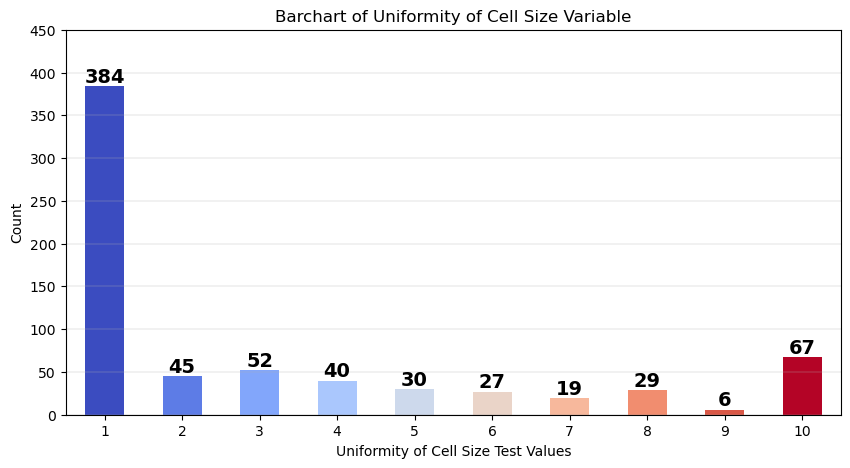

In [118]:
# Barchart for the Uniformity of Cell Size variable.
dfg = BCW_df[2].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Uniformity of Cell Size Variable', ylabel='Count', xlabel='Uniformity of Cell Size Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
plt.show()

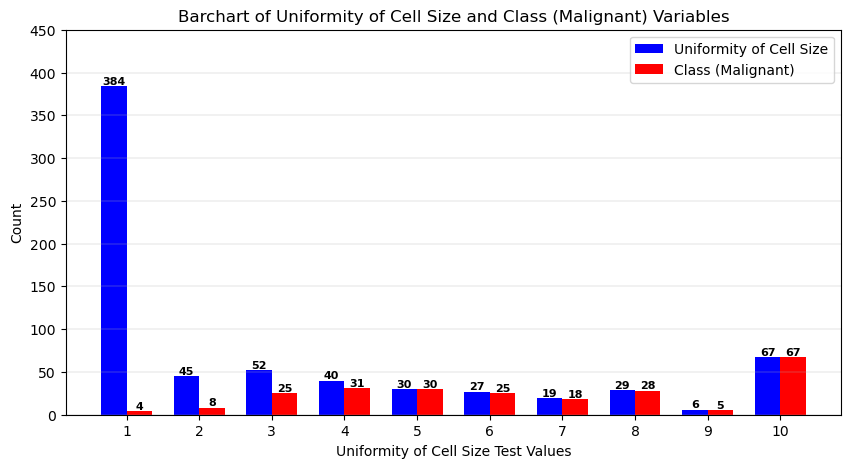

In [119]:
# Barchart for Uniformity of Cell Size variable with Class (Malignant).
# Get counts for Uniformity of Cell Size.
test_counts = BCW_df[2].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (Malignant) for each Uniformity of Cell Size value.
class_malignant = BCW_df[BCW_df[10] == 1][2].value_counts().reindex(range(1, 11))

# Set up the bar chart.
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Uniformity of Cell Size bars (blue).
ax.bar(x - width/2, test_counts, width, label='Uniformity of Cell Size', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Uniformity of Cell Size and Class (Malignant) Variables')
ax.set_xlabel('Uniformity of Cell Size Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [120]:
# Evaluate the Uniformity of Cell Shape variable value counts.
BCW_df[3].value_counts()

3
1     353
2      59
10     58
3      56
4      44
5      34
7      30
6      30
8      28
9       7
Name: count, dtype: int64

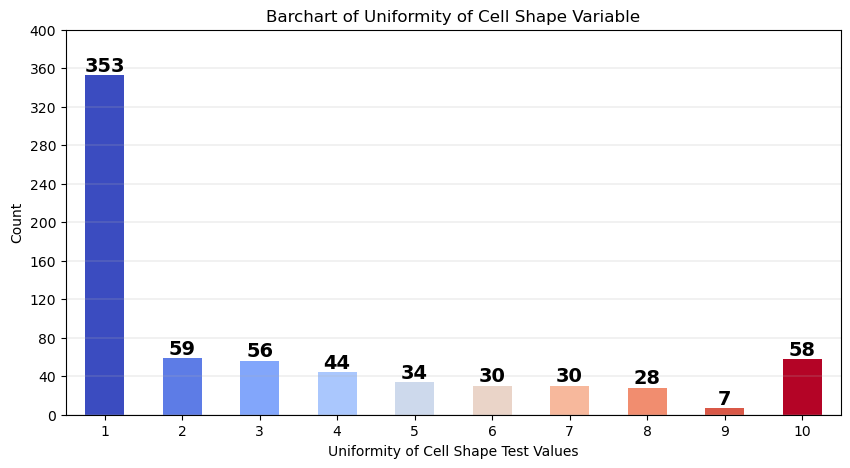

In [121]:
# Barchart for the Uniformity of Cell Shape variable.
dfg = BCW_df[3].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Uniformity of Cell Shape Variable', ylabel='Count', xlabel='Uniformity of Cell Shape Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 401, step=40))
plt.grid(axis='y', linewidth=0.25)
plt.show()

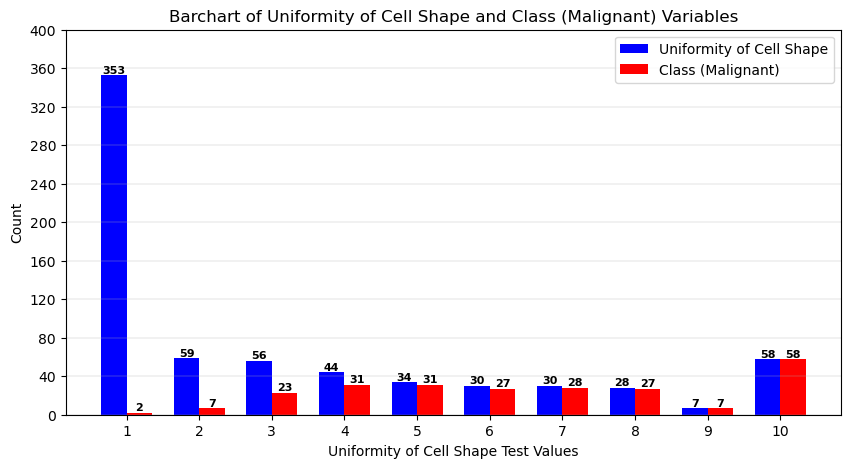

In [122]:
# Barchart for Uniformity of Cell Shape variable with Class (Malignant).
# Get counts for Uniformity of Cell Shape.
test_counts = BCW_df[3].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (Malignant) for each Uniformity of Cell Shape value.
class_malignant = BCW_df[BCW_df[10] == 1][3].value_counts().reindex(range(1, 11))

# Set up the bar chart.
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Uniformity of Cell Shape bars (blue).
ax.bar(x - width/2, test_counts, width, label='Uniformity of Cell Shape', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Uniformity of Cell Shape and Class (Malignant) Variables')
ax.set_xlabel('Uniformity of Cell Shape Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 401, step=40))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [123]:
# Evaluate the Marginal Adhesion variable value counts.
BCW_df[4].value_counts()

4
1     407
3      58
2      58
10     55
4      33
8      25
5      23
6      22
7      13
9       5
Name: count, dtype: int64

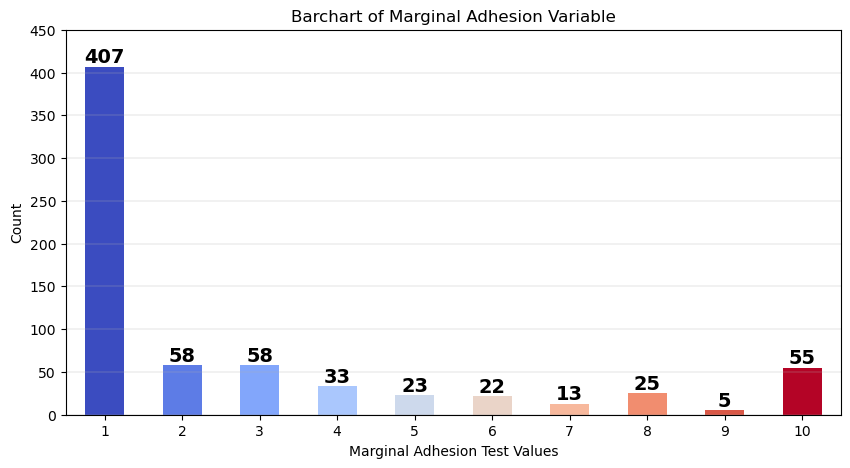

In [124]:
# Barchart for the Marginal Adhesion variable.
dfg = BCW_df[4].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Marginal Adhesion Variable', ylabel='Count', xlabel='Marginal Adhesion Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
plt.show()

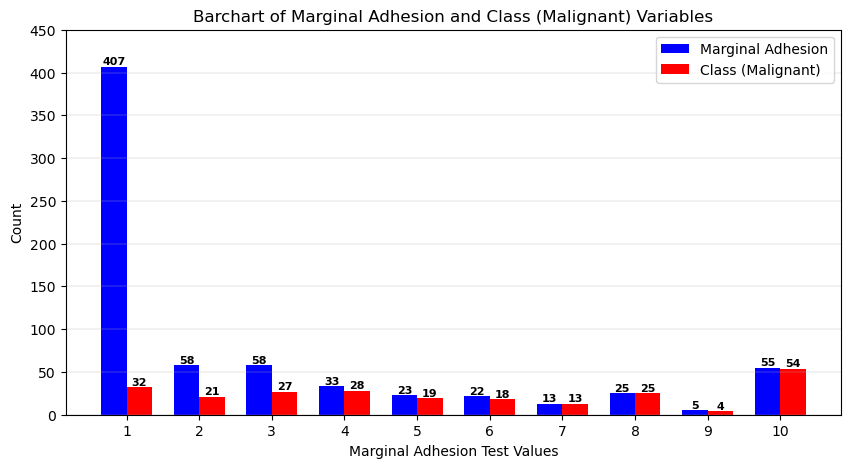

In [125]:
# Barchart for Marginal Adhesion variable with Class (Malignant).
# Get counts for Marginal Adhesion.
test_counts = BCW_df[4].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (Malignant) for each Marginal Adhesion value.
class_malignant = BCW_df[BCW_df[10] == 1][4].value_counts().reindex(range(1, 11))

# Set up the bar chart.
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Marginal Adhesion bars (blue).
ax.bar(x - width/2, test_counts, width, label='Marginal Adhesion', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Marginal Adhesion and Class (Malignant) Variables')
ax.set_xlabel('Marginal Adhesion Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [126]:
# Evaluate the Single Epithelial Cell Size variable value counts.
BCW_df[5].value_counts()

5
2     386
3      72
4      48
1      47
6      41
5      39
10     31
8      21
7      12
9       2
Name: count, dtype: int64

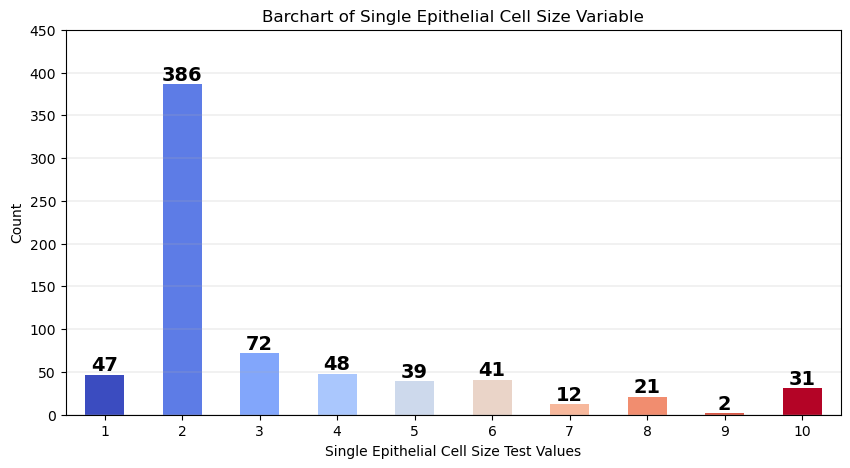

In [127]:
# Barchart for the Single Epithelial Cell Size variable.
dfg = BCW_df[5].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Single Epithelial Cell Size Variable', ylabel='Count', xlabel='Single Epithelial Cell Size Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
plt.show()

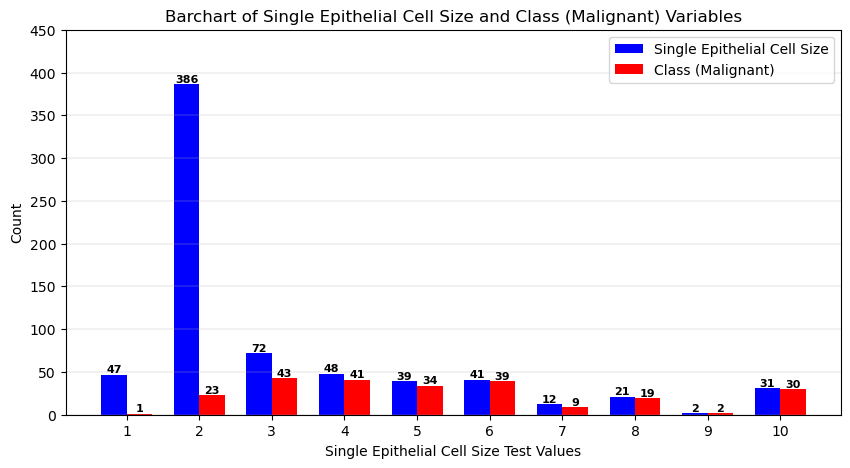

In [128]:
# Barchart for Single Epithelial Cell Size variable with Class (Malignant).
# Get counts for Single Epithelial Cell Size.
test_counts = BCW_df[5].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (Malignant) for each Single Epithelial Cell Size value.
class_malignant = BCW_df[BCW_df[10] == 1][5].value_counts().reindex(range(1, 11))

# Set up the bar chart.
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Single Epithelial Cell Size bars (blue).
ax.bar(x - width/2, test_counts, width, label='Single Epithelial Cell Size', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Single Epithelial Cell Size and Class (Malignant) Variables')
ax.set_xlabel('Single Epithelial Cell Size Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [129]:
# Evaluate the Bare Nuclei variable value counts.
BCW_df[6].value_counts()

6
1     402
10    132
2      30
5      30
3      28
8      21
4      19
?      16
9       9
7       8
6       4
Name: count, dtype: int64

In [ ]:
# Impute the Bare Nuclei variable using Random Sampling based on Class Target Distribution.
# Replace '?' with NaN.
BCW_df[6] = BCW_df[6].replace('?', np.nan)
   
# Convert to integer (will keep NaN for missing values).
BCW_df[6] = pd.to_numeric(BCW_df[6])
   
# Separate benign and malignant samples.
benign_data = BCW_df[BCW_df[10] == 0]
malignant_data = BCW_df[BCW_df[10] == 1]
   
# Get non-missing Bare_nuclei values for each class.
benign_non_missing = benign_data[6].dropna()
malignant_non_missing = malignant_data[6].dropna()
   
# Calculate frequency distributions.
benign_counts = benign_non_missing.value_counts(normalize=True)
benign_values = benign_counts.index.astype(int)
benign_probs = benign_counts.values
   
malignant_counts = malignant_non_missing.value_counts(normalize=True)
malignant_values = malignant_counts.index.astype(int)
malignant_probs = malignant_counts.values
   
# Impute missing values based on class.
np.random.seed(42)  # For reproducibility
for idx in BCW_df[BCW_df[6].isna()].index:
    if BCW_df.loc[idx, 10] == 1:
        # Impute for malignant (Class = 1).
        imputed_value = np.random.choice(malignant_values, size=1, p=malignant_probs)[0]
    else:
        # Impute for benign (Class = 0).
        imputed_value = np.random.choice(benign_values, size=1, p=benign_probs)[0]
    BCW_df.loc[idx, 6] = int(imputed_value)

# Ensure the entire column is a conforming integer type.
BCW_df[6] = BCW_df[6].astype(np.int64)

In [131]:
# Evaluate the imputed Bare Nuclei variable value counts.
BCW_df[6].value_counts()

6
1     415
10    133
5      32
2      30
3      28
8      21
4      19
9       9
7       8
6       4
Name: count, dtype: int64

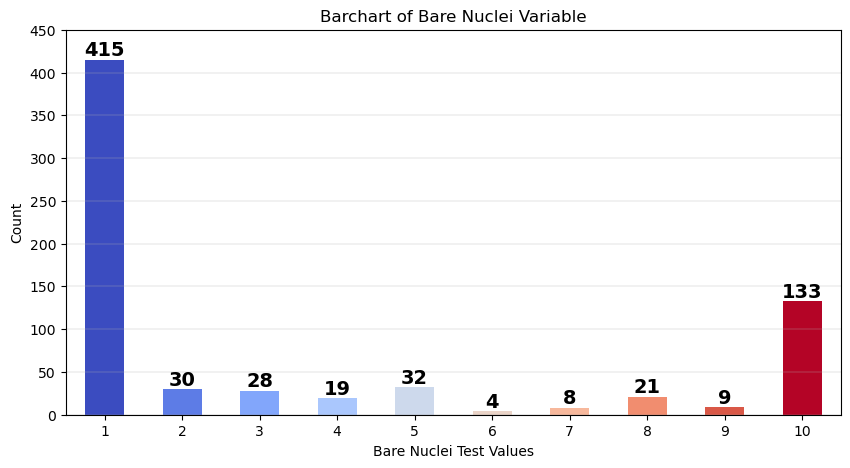

In [132]:
# Barchart for the Bare Nuclei variable.
dfg = BCW_df[6].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Bare Nuclei Variable', ylabel='Count', xlabel='Bare Nuclei Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
plt.show()

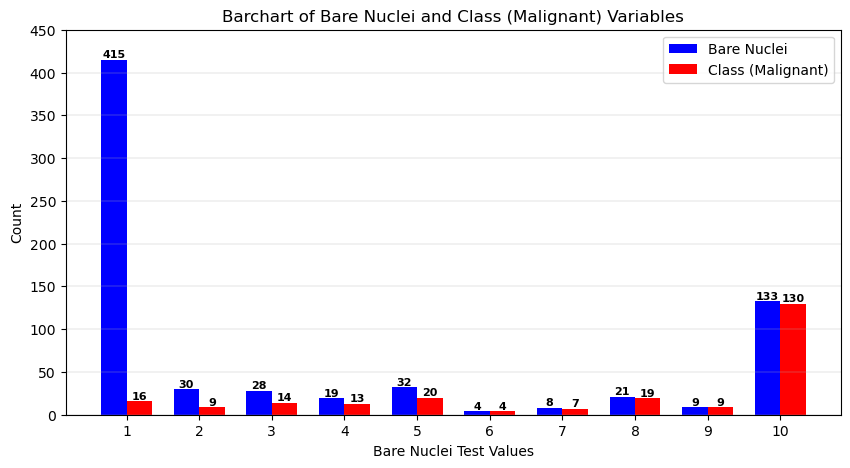

In [133]:
# Barchart for Bare Nuclei variable with Class (Malignant).
# Get counts for Bare Nuclei.
test_counts = BCW_df[6].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (Malignant) for each Bare Nuclei value.
class_malignant = BCW_df[BCW_df[10] == 1][6].value_counts().reindex(range(1, 11))

# Set up the bar chart
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Bare Nuclei bars (blue).
ax.bar(x - width/2, test_counts, width, label='Bare Nuclei', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Bare Nuclei and Class (Malignant) Variables')
ax.set_xlabel('Bare Nuclei Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 451, step=50))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [134]:
# Evaluate the Bland Chromatin variable value counts.
BCW_df[7].value_counts()

7
2     166
3     165
1     152
7      73
4      40
5      34
8      28
10     20
9      11
6      10
Name: count, dtype: int64

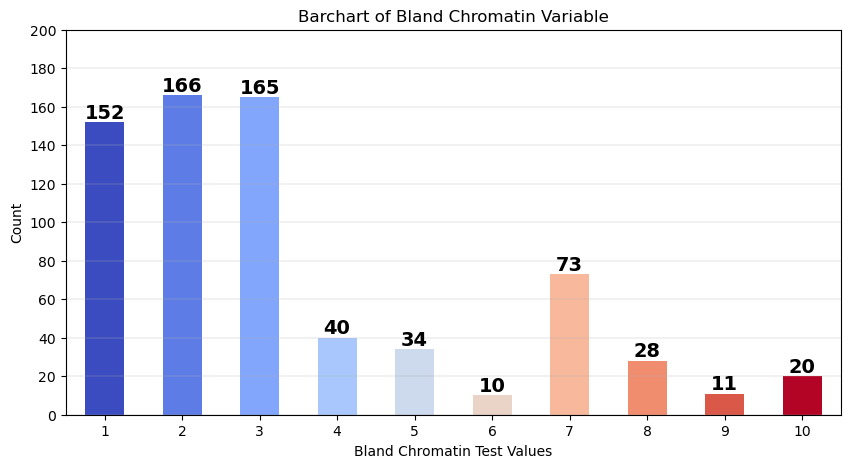

In [135]:
# Barchart for the Bland Chromatin variable.
dfg = BCW_df[7].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Bland Chromatin Variable', ylabel='Count', xlabel='Bland Chromatin Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 201, step=20))
plt.grid(axis='y', linewidth=0.25)
plt.show()

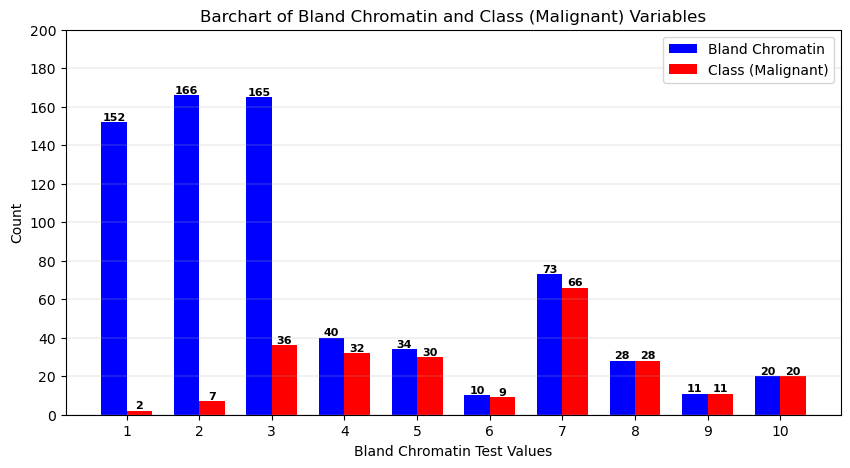

In [136]:
# Barchart for Bland Chromatin variable with Class (Malignant).
# Get counts for Bland Chromatin.
test_counts = BCW_df[7].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (malignant) for each Bland Chromatin value.
class_malignant = BCW_df[BCW_df[10] == 1][7].value_counts().reindex(range(1, 11))

# Set up the bar chart.
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Bland Chromatin bars (blue).
ax.bar(x - width/2, test_counts, width, label='Bland Chromatin', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Bland Chromatin and Class (Malignant) Variables')
ax.set_xlabel('Bland Chromatin Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 201, step=20))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [137]:
# Evaluate the Normal Nucleoli variable value counts.
BCW_df[8].value_counts()

8
1     443
10     61
3      44
2      36
8      24
6      22
5      19
4      18
7      16
9      16
Name: count, dtype: int64

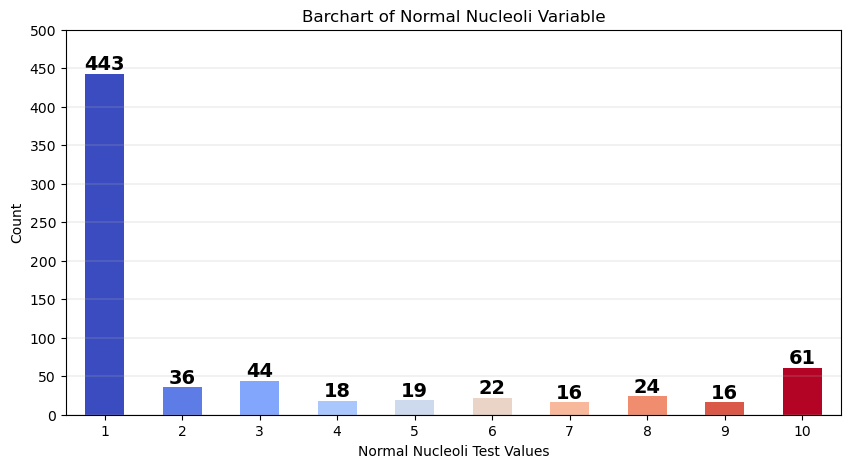

In [138]:
# Barchart for the Normal Nucleoli variable.
dfg = BCW_df[8].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Normal Nucleoli Variable', ylabel='Count', xlabel='Normal Nucleoli Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 501, step=50))
plt.grid(axis='y', linewidth=0.25)
plt.show()

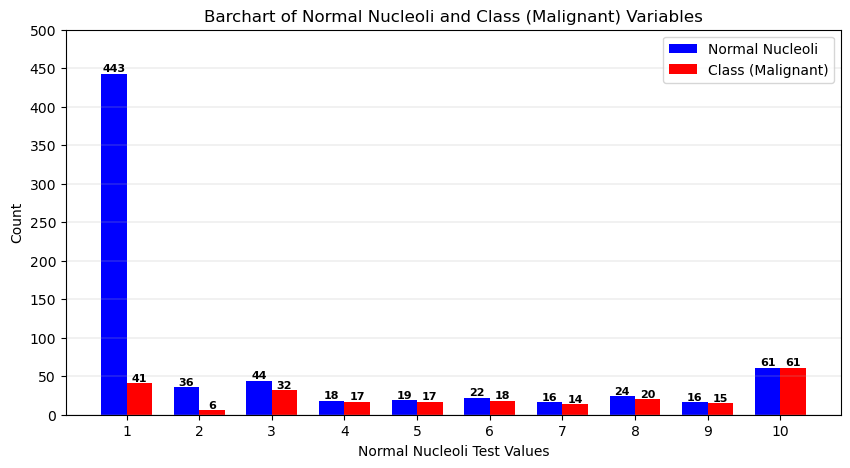

In [139]:
# Barchart for Normal Nucleoli variable with Class (Malignant).
# Get counts for Normal Nucleoli.
test_counts = BCW_df[8].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (malignant) for each Normal Nucleoli value.
class_malignant = BCW_df[BCW_df[10] == 1][8].value_counts().reindex(range(1, 11))

# Set up the bar chart
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Normal Nucleoli bars (blue).
ax.bar(x - width/2, test_counts, width, label='Normal Nucleoli', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Normal Nucleoli and Class (Malignant) Variables')
ax.set_xlabel('Normal Nucleoli Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 501, step=50))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

In [140]:
# Evaluate the Mitoses variable value counts.
BCW_df[9].value_counts()

9
1     579
2      35
3      33
10     14
4      12
7       9
8       8
5       6
6       3
Name: count, dtype: int64

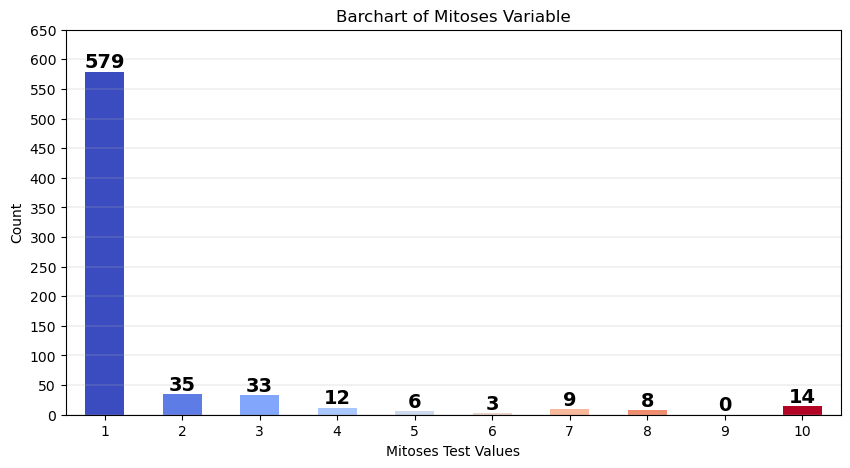

In [141]:
# Barchart for the Mitoses variable.
dfg = BCW_df[9].value_counts()
# Create a list of all possible test values (1 to 10) in order.
test_values = [int(i) for i in range(1, 11)]
# Reindex dfg to include all test values (1 to 10).
dfg = dfg.reindex(test_values)

# Create a color gradient (e.g., from blue to red).
colors = cm.coolwarm(np.linspace(0, 1, len(test_values)))  # coolwarm colormap for gradient.

# Plot the bar chart.
ax = dfg.plot(kind='bar', title='Barchart of Mitoses Variable', ylabel='Count', xlabel='Mitoses Test Values', color=colors, rot=0, figsize=(10,5))
ax.bar_label(ax.containers[0], color='black', fontsize=14, fontweight='bold')
ax.set_xticks(range(len(test_values)))
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 651, step=50))
plt.grid(axis='y', linewidth=0.25)
plt.show()

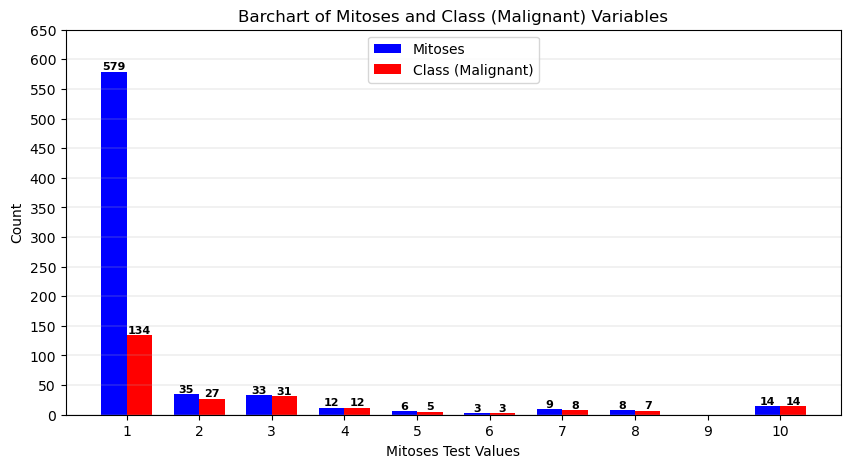

In [142]:
# Barchart for Mitoses variable with Class (Malignant).
# Get counts for Mitoses.
test_counts = BCW_df[9].value_counts().reindex(range(1, 11))

# Get counts of Class=1 (malignant) for each Mitoses value.
class_malignant = BCW_df[BCW_df[10] == 1][9].value_counts().reindex(range(1, 11))

# Set up the bar chart.
test_values = list(range(1, 11))  # x-axis values 1 to 10
x = np.arange(len(test_values))  # Positions for bars
width = 0.35  # Width of each bar (adjust for spacing)

fig, ax = plt.subplots(figsize=(10, 5))
# Plot Mitoses bars (blue).
ax.bar(x - width/2, test_counts, width, label='Mitoses', color='blue')
# Plot Class=1 bars (red).
ax.bar(x + width/2, class_malignant, width, label='Class (Malignant)', color='red')

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

# Customize the chart.
ax.set_title('Barchart of Mitoses and Class (Malignant) Variables')
ax.set_xlabel('Mitoses Test Values')
ax.set_ylabel('Count')
ax.set_xticks(x)
ax.set_xticklabels(test_values)
plt.yticks(np.arange(0, 651, step=50))
plt.grid(axis='y', linewidth=0.25)
ax.legend()

plt.show()

Save cleaned and processed data to .csv file for modeling, and generate dscriptive statistics for the data.

In [143]:
# Save processed data.
BCW_df.to_csv('breast-cancer-wisconsin_cleaned.csv', index=False, float_format='%d')
print("\nProcessed Data Saved to 'breast-cancer-wisconsin_cleaned.csv'")

# Summary statistics.
print("\nProcessed Data Description:")
features = [1,2,3,4,5,6,7,8,9,10]
BCW_df[features].describe()


Processed Data Saved to 'breast-cancer-wisconsin_cleaned.csv'

Processed Data Description:


,1,2,3,4,5,6,7,8,9,10
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.510730,3.437768,2.866953,1.589413,0.344778
std,2.815741,3.051459,2.971913,2.855379,2.214300,3.627472,2.438364,3.053634,1.715078,0.475636
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,0.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.500000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Generate correlation matrix associated with the predictor and target variables.

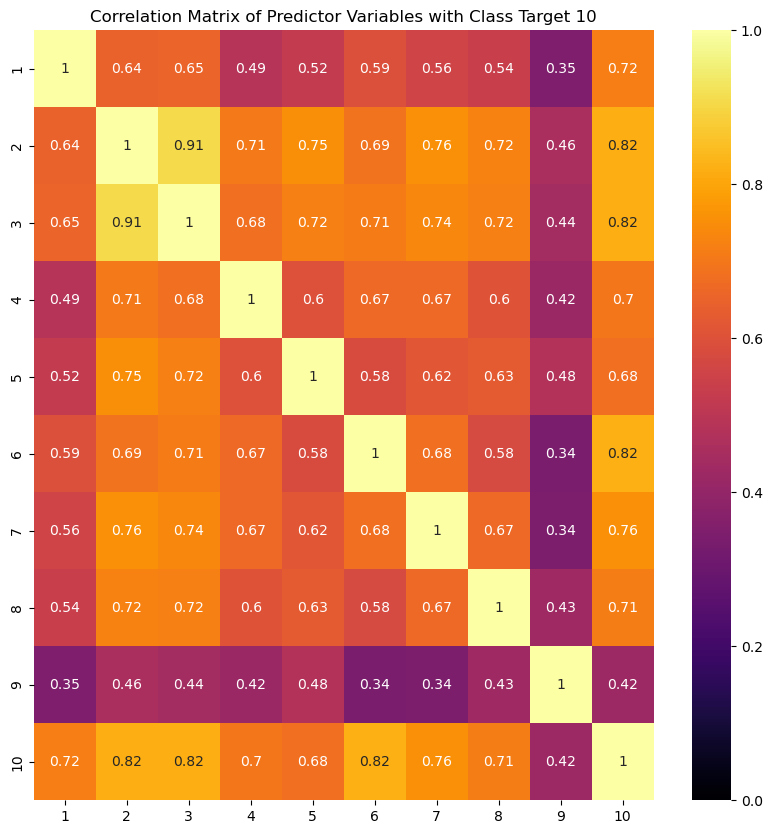

In [144]:
# Create correlation matrix of predictor variables with Class target.
plt.figure(figsize=(10, 10))
correlation_matrix = BCW_df[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='inferno', vmin=0, vmax=1)
plt.title('Correlation Matrix of Predictor Variables with Class Target 10')
plt.show()

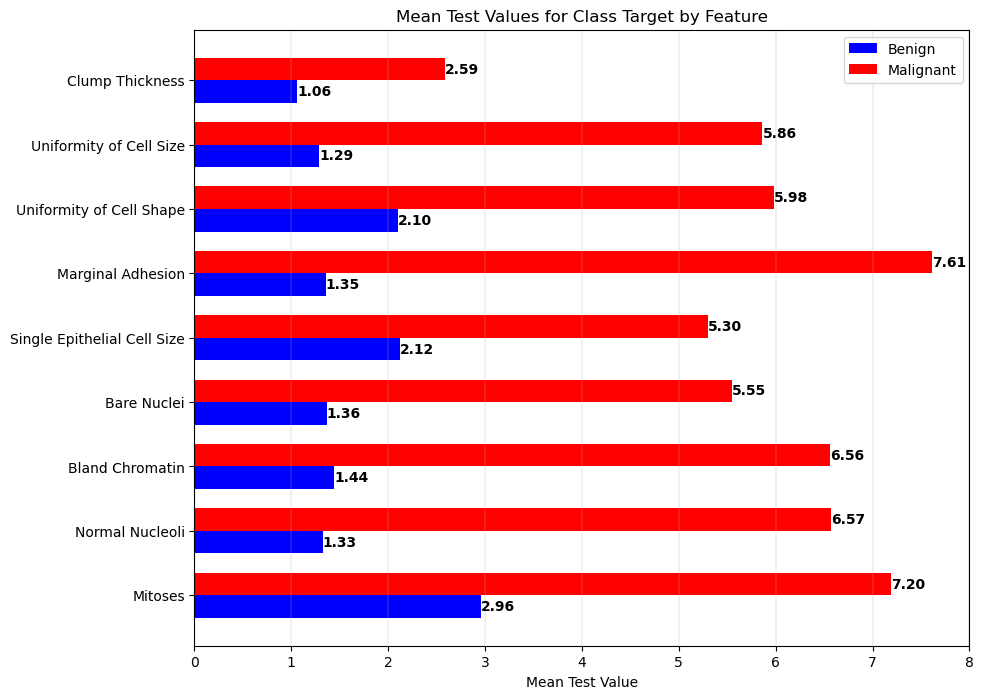

In [145]:
# Create horizontal bar chart of mean test values for class target by feature.
# Define feature names (columns 1 to 9)
feature_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9]
feature_names = [
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
]

# Calculate mean values for each feature by class (0: Benign, 1: Malignant)
means = BCW_df.groupby(10)[feature_columns].mean().T
means.columns = ['Benign', 'Malignant']
means['Feature'] = feature_names[::-1]  # Reverse the feature order
means = means.set_index('Feature')

# Horizontal bar chart
fig, ax = plt.subplots(figsize=(10, 8))
y = np.arange(len(feature_names))
width = 0.35

# Plot bars (reversed order is handled by feature_names[::-1])
ax.barh(y - width/2, means['Benign'], width, label='Benign', color='blue')
ax.barh(y + width/2, means['Malignant'], width, label='Malignant', color='red')

# Customize
ax.set_yticks(y)
ax.set_yticklabels(means.index)  # Use the reversed index
ax.set_xlabel('Mean Test Value')
ax.set_title('Mean Test Values for Class Target by Feature')
ax.legend()
ax.grid(axis='x', linewidth=0.25)

# Set x-axis limit to 8
ax.set_xlim(0, 8)

# Add bar labels
for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', color='black', fontsize=10, fontweight='bold')

plt.show()

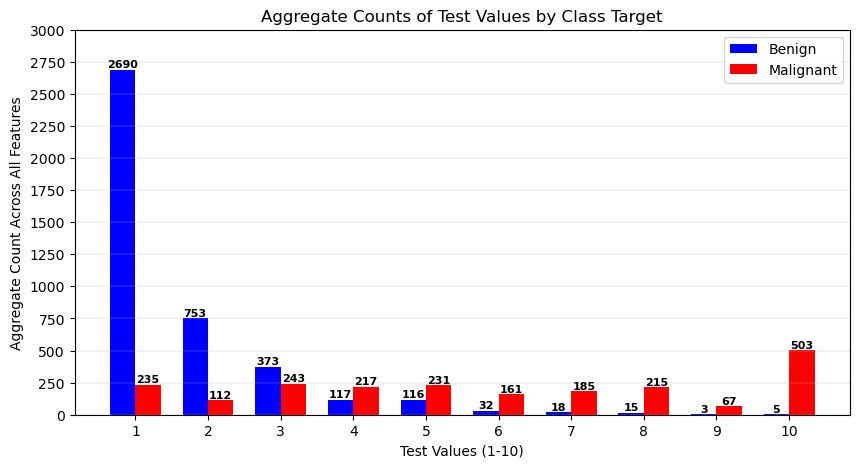

In [146]:
# Create bar chart of aggregate counts of test values by class target.
# Aggregate counts across all features (columns 1 to 9) for values 1-10 by class target.
feature_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9]

# Melt the DataFrame to long format.
melted = pd.melt(BCW_df, id_vars=[10], value_vars=feature_columns, var_name='Feature', value_name='Value')

# Filter to only include values 1-10 (ignore NaN or other values).
melted = melted[melted['Value'].between(1, 10)]

# Group by Value and Class, count occurrences.
counts = melted.groupby(['Value', 10]).size().unstack(fill_value=0)
counts.columns = ['Benign', 'Malignant']
counts = counts.reindex(range(1, 11), fill_value=0)

# Vertical bar chart.
fig, ax = plt.subplots(figsize=(10, 5))
test_values = list(range(1, 11))
x = np.arange(len(test_values))
width = 0.35

ax.bar(x - width/2, counts['Benign'], width, label='Benign', color='blue')
ax.bar(x + width/2, counts['Malignant'], width, label='Malignant', color='red')

ax.set_xticks(x)
ax.set_xticklabels(test_values)
ax.set_xlabel('Test Values (1-10)')
ax.set_ylabel('Aggregate Count Across All Features')
ax.set_title('Aggregate Counts of Test Values by Class Target')
ax.legend()
plt.yticks(np.arange(0, 3001, step=250))
plt.grid(axis='y', linewidth=0.25)

# Add bar labels.
ax.bar_label(ax.containers[0], color='black', fontsize=8, fontweight='bold')
ax.bar_label(ax.containers[1], color='black', fontsize=8, fontweight='bold')

plt.show()

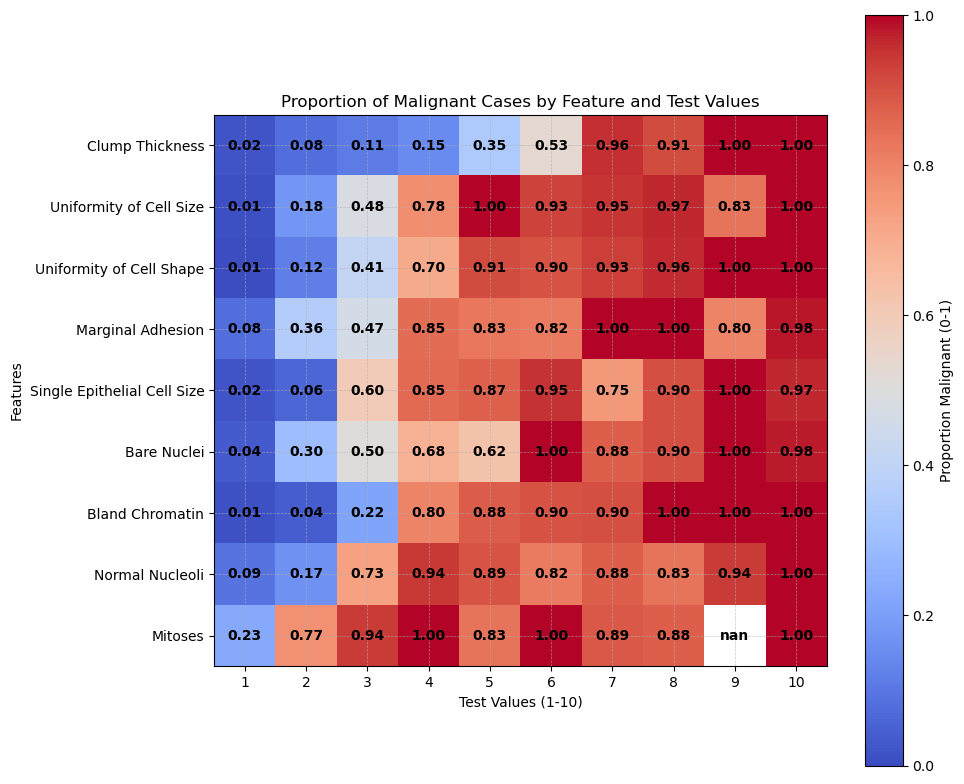


Malignancy Proportion Matrix:
                                   1         2         3         4         5   \
Clump Thickness              0.020690  0.080000  0.111111  0.150000  0.346154   
Uniformity of Cell Size      0.010417  0.177778  0.480769  0.775000  1.000000   
Uniformity of Cell Shape     0.005666  0.118644  0.410714  0.704545  0.911765   
Marginal Adhesion            0.078624  0.362069  0.465517  0.848485  0.826087   
Single Epithelial Cell Size  0.021277  0.059585  0.597222  0.854167  0.871795   
Bare Nuclei                  0.038554  0.300000  0.500000  0.684211  0.625000   
Bland Chromatin              0.013158  0.042169  0.218182  0.800000  0.882353   
Normal Nucleoli              0.092551  0.166667  0.727273  0.944444  0.894737   
Mitoses                      0.231434  0.771429  0.939394  1.000000  0.833333   

                                   6         7         8         9         10  
Clump Thickness              0.529412  0.956522  0.913043  1.000000  1.000000 

In [147]:
# Create malignancy proportional matrix by features and test values.
# Define feature names and columns
feature_columns = [1, 2, 3, 4, 5, 6, 7, 8, 9]
feature_names = [
    'Clump Thickness',
    'Uniformity of Cell Size',
    'Uniformity of Cell Shape',
    'Marginal Adhesion',
    'Single Epithelial Cell Size',
    'Bare Nuclei',
    'Bland Chromatin',
    'Normal Nucleoli',
    'Mitoses'
]

# Melt DataFrame to long format
melted = pd.melt(BCW_df, id_vars=[10], value_vars=feature_columns, var_name='Feature', value_name='Value')

# Clean data: Replace '?' with NaN and convert to float
melted['Value'] = melted['Value'].replace('?', np.nan).astype(float)

# Filter values 1–10 and remove rows with NaN
melted = melted[melted['Value'].between(1, 10)].dropna()

# Create a pivot table to get counts of Class (0 and 1) for each feature-value pair
pivot = pd.pivot_table(melted, index='Feature', columns='Value', values=10, aggfunc='count', fill_value=0)

# Calculate total counts (benign + malignant) for each feature-value pair
total_counts = pivot.groupby(level=0).sum()

# Create a DataFrame for malignant counts (Class = 1)
malignant_counts = pd.pivot_table(melted[melted[10] == 1], index='Feature', columns='Value', values=10, aggfunc='count', fill_value=0)

# Calculate proportion of malignant (malignant / total)
proportion_matrix = malignant_counts.div(total_counts, fill_value=0)

# Replace numeric indices with feature names and test values
proportion_matrix.index = feature_names
proportion_matrix.columns = range(1, 11)

# Visualize as a heatmap
fig, ax = plt.subplots(figsize=(10, 8))
im = ax.imshow(proportion_matrix, cmap='coolwarm', vmin=0, vmax=1)

# Add colorbar
plt.colorbar(im, ax=ax, label='Proportion Malignant (0-1)')

# Set labels
ax.set_xticks(np.arange(len(proportion_matrix.columns)))
ax.set_xticklabels(proportion_matrix.columns)
ax.set_yticks(np.arange(len(proportion_matrix.index)))
ax.set_yticklabels(proportion_matrix.index)

# Rotate x-axis labels for readability
plt.setp(ax.get_xticklabels(), rotation=0, ha='center', rotation_mode='anchor')

# Add grid for clarity.
ax.grid(which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add values in cells.
for i in range(len(proportion_matrix.index)):
    for j in range(len(proportion_matrix.columns)):
        ax.text(j, i, f'{proportion_matrix.iloc[i, j]:.2f}',
                ha='center', va='center', color='black', fontsize=10, fontweight='bold')

ax.set_xlabel('Test Values (1-10)')
ax.set_ylabel('Features')
ax.set_title('Proportion of Malignant Cases by Feature and Test Values')

plt.tight_layout()
plt.show()

# Optional: Print the matrix for reference.
print("\nMalignancy Proportion Matrix:")
print(proportion_matrix)